# Pokemon Data Analysis

## Summary

Pokemon have a variety of attributes, types and can either be legendary or not. The aim of this analysis was to whether legendary Pokemon are generally better than non-legendary Pokemon and if some Pokemon types have higher attribute scores compared to others. The attributes of legendary versus non-legendary pokemon was first visualized to determine to assess the distribution of the attributes. Non-legendary Pokemon were then grouped by their types and the attributes of single-type Pokemon were visualized to assess the distribution of scores between types. 

## Overview of the Dataset

The dataset has 801 unique Pokemon entries with 41 different categories which include attributes such as the Pokemon's name, its type(s), height, weight, attack, defense, speed and so on.

#### Snapshot of the Data Table

In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [123]:
file_name = "pokemon.csv"
data = pd.read_csv(file_name)
data

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,['Beast Boost'],0.25,1.0,0.5,2.0,0.5,1.0,2.0,0.5,1.0,...,NaN,797,107,101,61,steel,flying,999.9,7,1
797,['Beast Boost'],1.00,1.0,0.5,0.5,0.5,2.0,4.0,1.0,1.0,...,NaN,798,59,31,109,grass,steel,0.1,7,1
798,['Beast Boost'],2.00,0.5,2.0,0.5,4.0,2.0,0.5,1.0,0.5,...,NaN,799,97,53,43,dark,dragon,888.0,7,1
799,['Prism Armor'],2.00,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,...,NaN,800,127,89,79,psychic,NaN,230.0,7,1


#### Shape of the Table

In [124]:
data.shape

(801, 41)

#### Column Names

In [125]:
column_names = data.columns
", ".join(column_names)


'abilities, against_bug, against_dark, against_dragon, against_electric, against_fairy, against_fight, against_fire, against_flying, against_ghost, against_grass, against_ground, against_ice, against_normal, against_poison, against_psychic, against_rock, against_steel, against_water, attack, base_egg_steps, base_happiness, base_total, capture_rate, classfication, defense, experience_growth, height_m, hp, japanese_name, name, percentage_male, pokedex_number, sp_attack, sp_defense, speed, type1, type2, weight_kg, generation, is_legendary'

## Insights from the Dataset

Less than 10% of Pokemon are Legendary, legendary Pokemon are distributed to have better attributes than non-legendary Pokemon

### Legendary Versus Non-Legendary Pokemon

([<matplotlib.patches.Wedge at 0x177844f0190>,
 [Text(1.058803170024717, 0.2982211379926153, 'Legendary'),
  Text(-1.0588031909658229, -0.29822106364338397, 'Non-Legendary')],
 [Text(0.5775290018316638, 0.16266607526869925, '8.7%'),
  Text(-0.5775290132540851, -0.16266603471457305, '91.3%')])

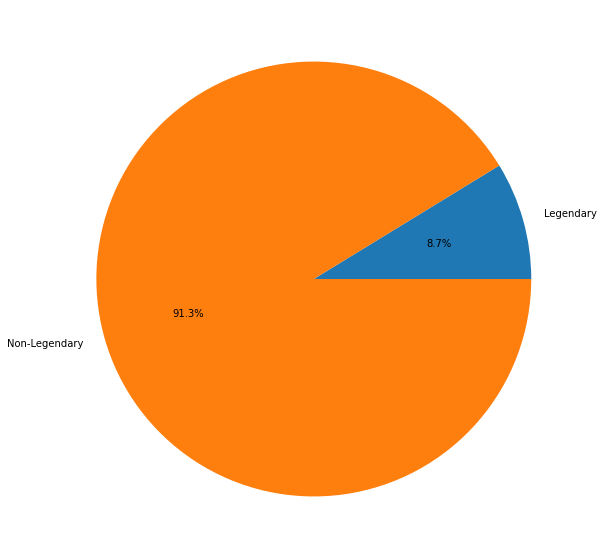

In [126]:
is_legendary = data[data["is_legendary"] == 1]
not_legendary = data[data["is_legendary"] ==  0]

ratio = [len(is_legendary), len(not_legendary)]
labels = ["Legendary", "Non-Legendary"]

fig, ax =plt.subplots(figsize=(10,10))
ax.pie(ratio, labels=labels, autopct='%1.1f%%')

In [127]:
physical_attributes = ["weight_kg", "height_m", "attack", "defense", "hp", "speed"]

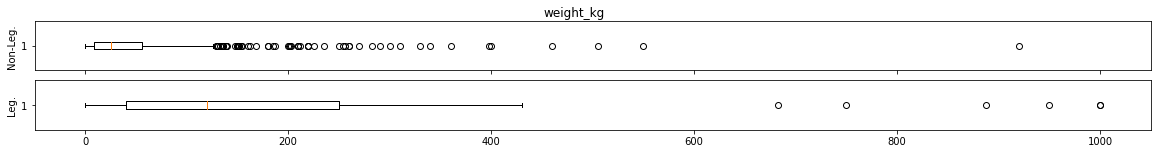

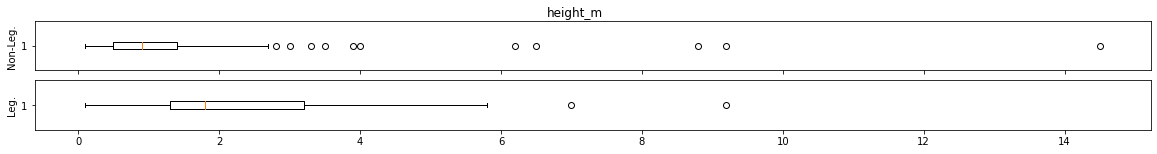

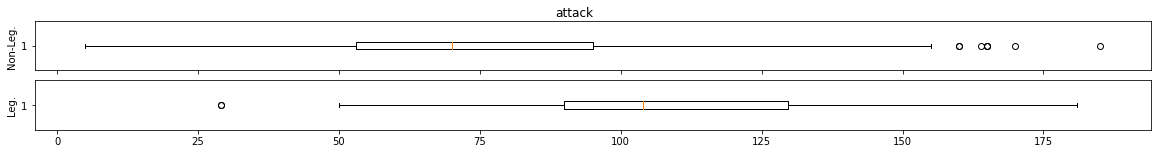

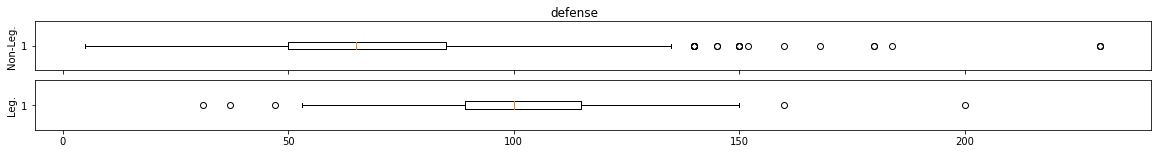

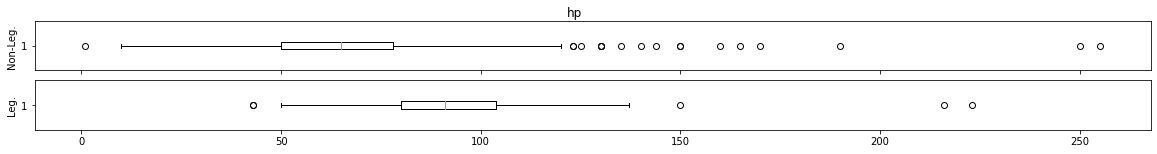

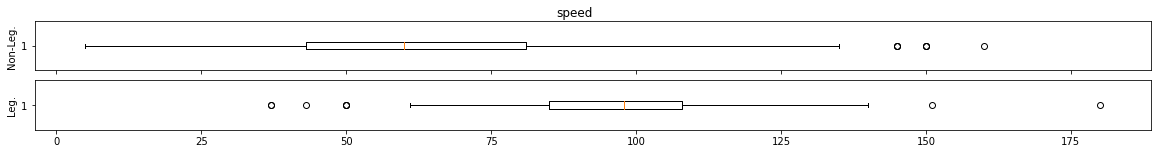

In [128]:
for attribute in physical_attributes:
    fig, ax = plt.subplots(2, figsize=(20, 2), sharex=True)
    fig.suptitle(attribute)
    
    ax[0].boxplot(not_legendary[attribute].dropna(), vert=False)
    ax[0].set(ylabel="Non-Leg.")
    ax[1].boxplot(is_legendary[attribute].dropna(), vert=False)
    ax[1].set(ylabel="Leg.")

### Single-Type Versus Dual Type Non-Legendary Pokemon

In [129]:
types = list(set(data["type1"]))
types.sort()
print(types)
", ".join(types)

['bug', 'dark', 'dragon', 'electric', 'fairy', 'fighting', 'fire', 'flying', 'ghost', 'grass', 'ground', 'ice', 'normal', 'poison', 'psychic', 'rock', 'steel', 'water']


'bug, dark, dragon, electric, fairy, fighting, fire, flying, ghost, grass, ground, ice, normal, poison, psychic, rock, steel, water'

([<matplotlib.patches.Wedge at 0x1778305c250>,
 [Text(0.03072434277044909, 1.0995708320801003, 'Single Type'),
  Text(-0.030724342770449713, -1.0995708320801003, 'Dual Type')],
 [Text(0.016758732420244955, 0.5997659084073274, '49.1%'),
  Text(-0.016758732420245295, -0.5997659084073274, '50.9%')])

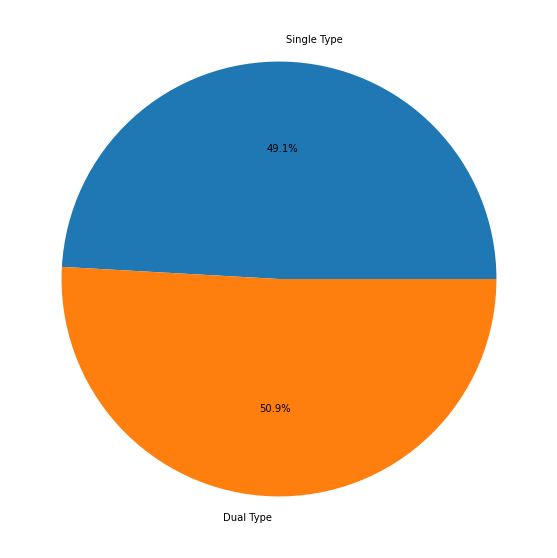

In [130]:
single_type = not_legendary[not_legendary["type2"].isna()]
dual_type = not_legendary[not_legendary["type2"].notna()]
single_numbers = single_type["name"].count()
dual_numbers = dual_type["name"].count()

fig, ax = plt.subplots(figsize=(10,10))
ax.pie([single_numbers, dual_numbers], labels=["Single Type", "Dual Type"], autopct='%1.1f%%')


### Comparison of Single-Type Non-Legendary Pokemon

<AxesSubplot:ylabel='None'>

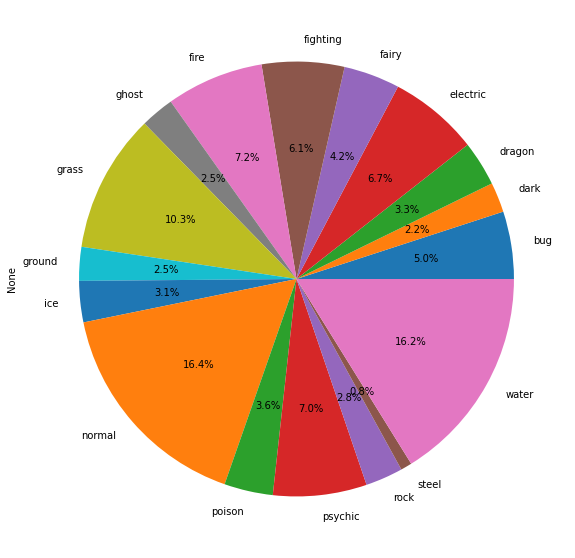

In [131]:
single_grouped = single_type.groupby("type1").size()
single_grouped.plot.pie(y="type1", figsize=(10, 10), autopct='%1.1f%%')

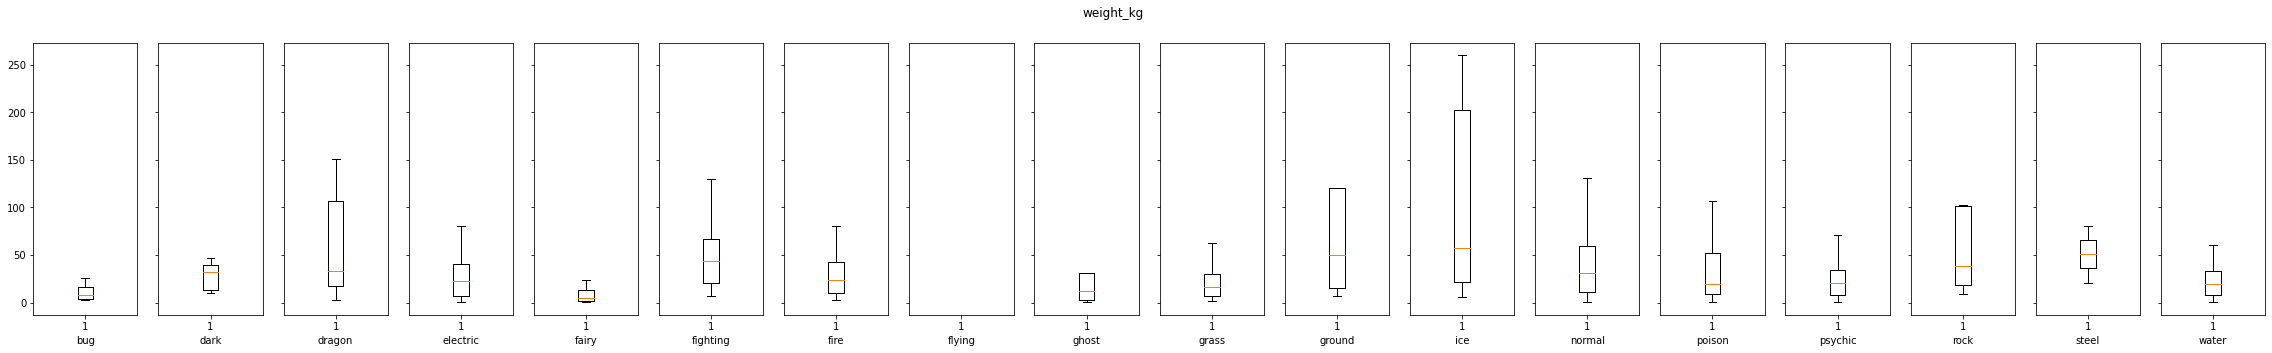

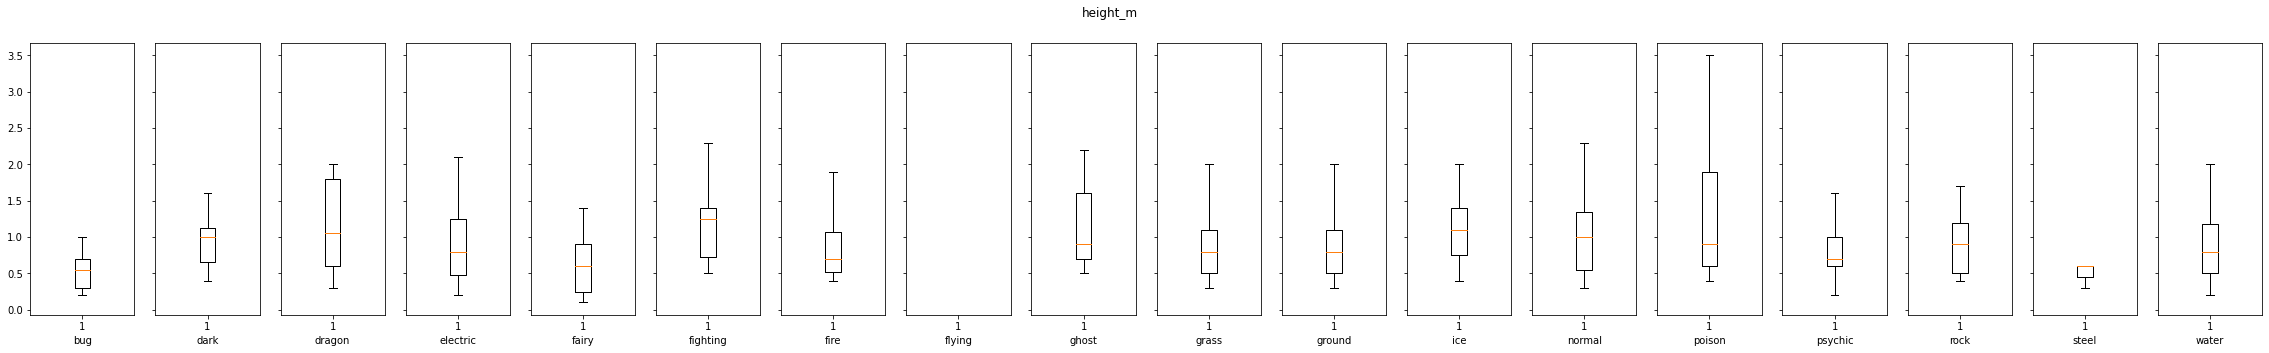

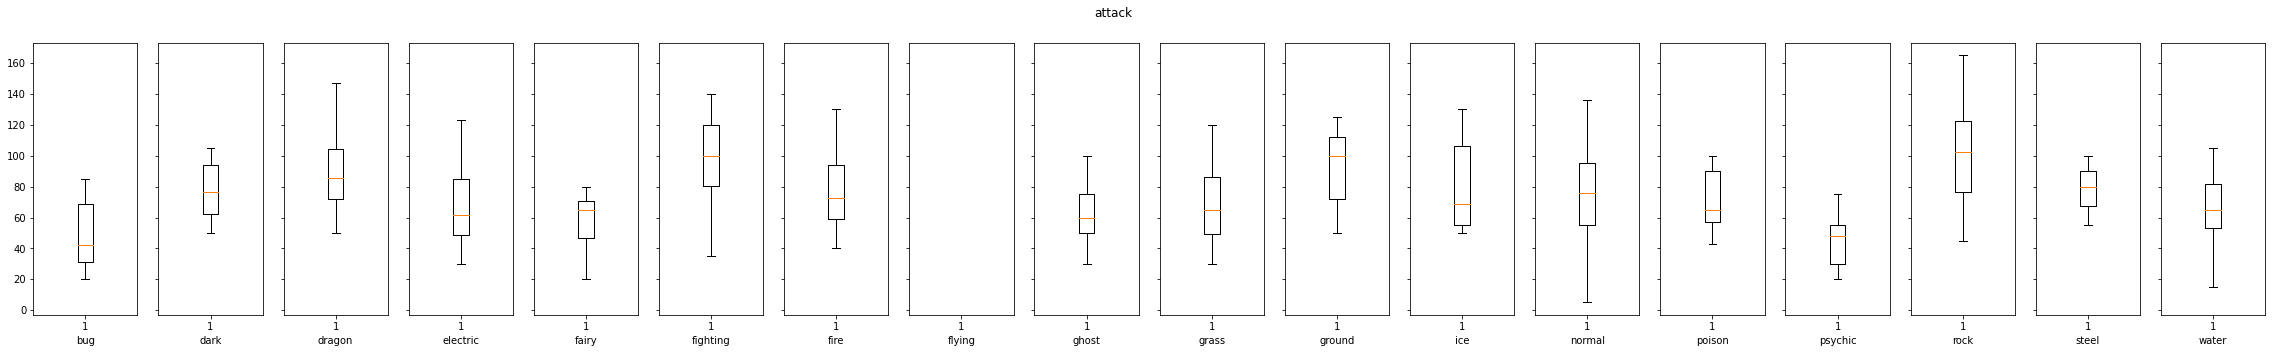

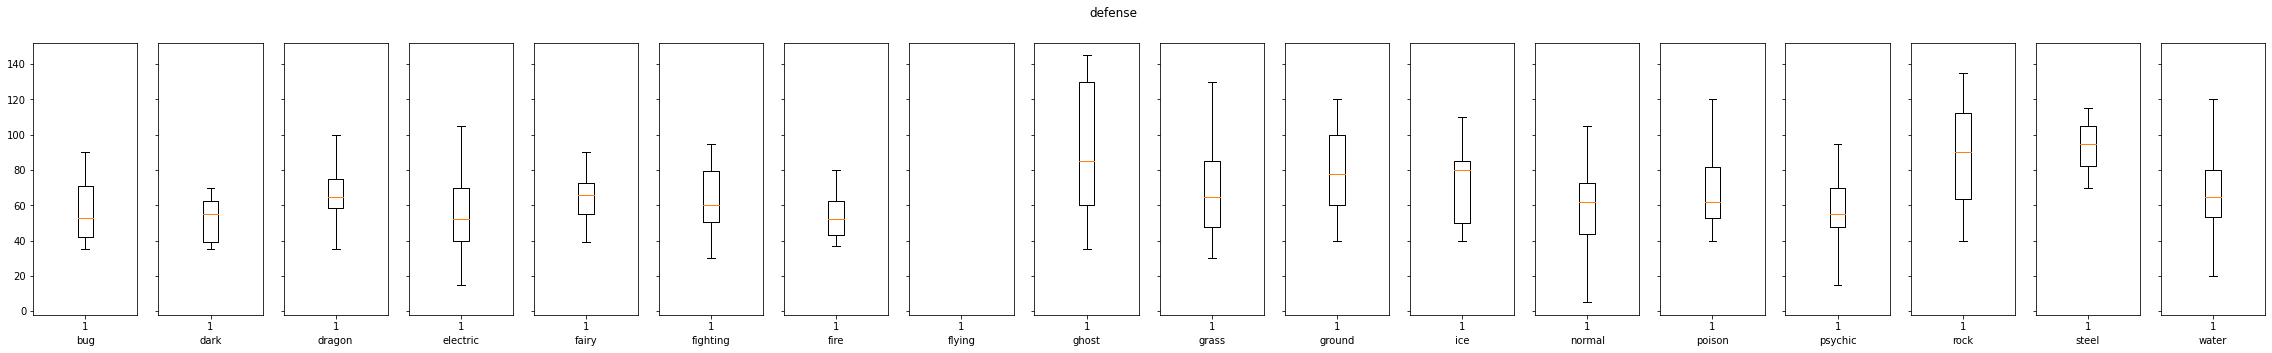

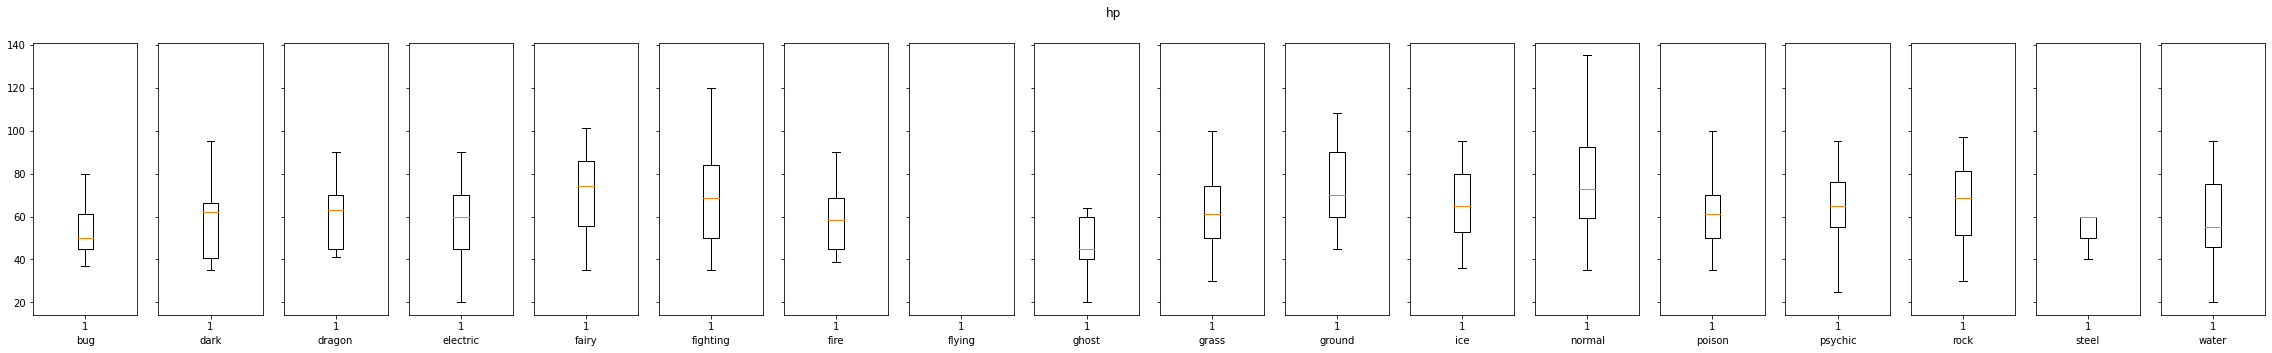

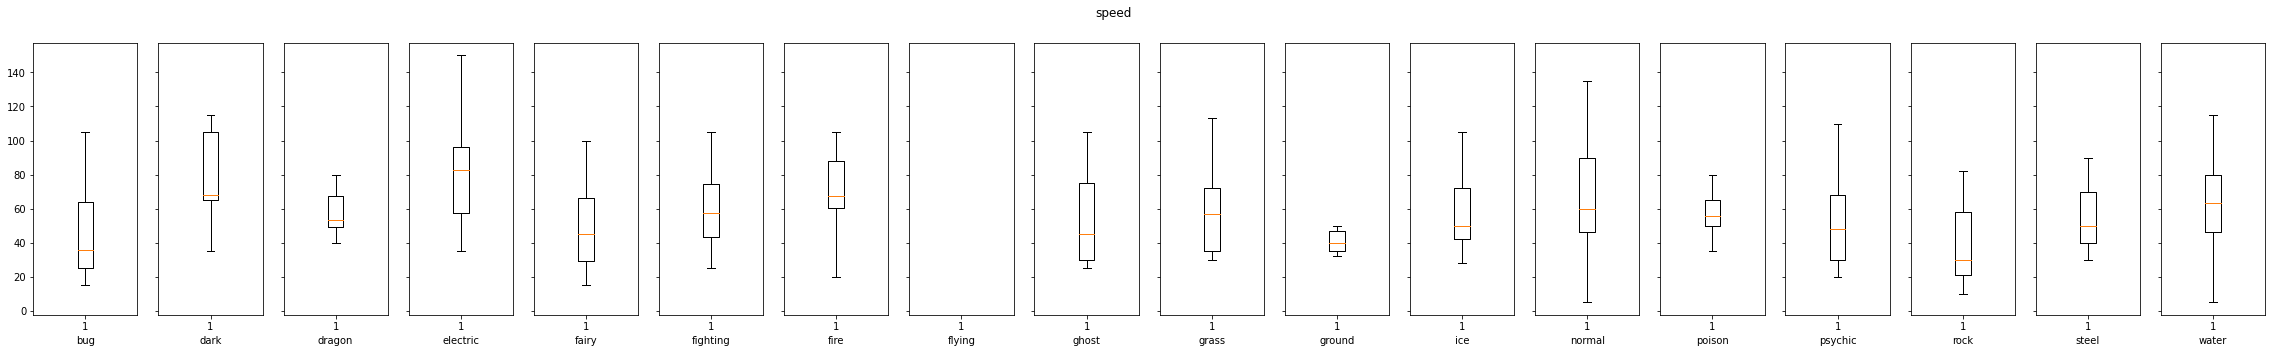

In [132]:
single_type = single_type[single_type["is_legendary"] == 0]
for attribute in physical_attributes:
    fig, axs = plt.subplots(1, len(types), sharey=True, figsize=(40, 5))
    fig.suptitle(attribute)
    for type in range(len(types)):
        type_data = single_type[single_type["type1"] == types[type]]
        axs[type].boxplot(type_data[attribute].dropna(), vert=True, showfliers=False) #outliers have been hidden
        axs[type].set(xlabel=types[type])